In [1]:
# Dependencies
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_terms = ("@BBCNews", "@CBSNews", "@CNN",
                "@FoxNews", "@nytimes")
#Final DF for csv
social_analytics_df = pd.DataFrame()

# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    news_media = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    date_created = []
    tweets_ago = []
    
    # Run search around each tweet
    public_tweets = api.user_timeline(target, count=100)
    # Loop through all tweets
    i = 0
    for tweet in public_tweets:
            
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        tweet_text = tweet["text"]
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        date_created.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        # Add each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i+1

    #Dictionary
    sentiment_df = pd.DataFrame({
        "News_Media": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Negative": negative_list,
        "Neutral": neutral_list,
        "Date_created": date_created,
        "Tweets_ago": tweets_ago
#         "Tweet Count": len(compound_list)
    })
    social_analytics_df = social_analytics_df.append(sentiment_df)
    
social_analytics_df.set_index('News_Media', 'Date_Created')
social_analytics_df.to_csv("./news_tweets.csv")

In [30]:
#Create X-axis values
tweets_ago = social_analytics_df.loc[social_analytics_df.News_Media=='@BBCNews']['Tweets_ago']
tweet_compound = social_analytics_df.loc[social_analytics_df.News_Media=='@BBCNews']['Compound']


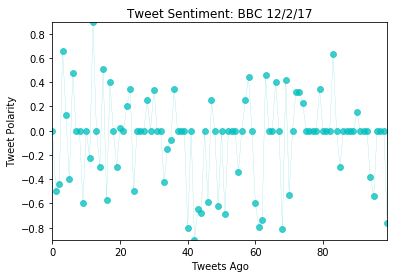

In [31]:
# Plot Time Between Tweets
plt.scatter(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.5, color="c")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: BBC 12/2/17")
plt.savefig("./bbcnews.png")
plt.show()

In [5]:
#Create X-axis values
tweets_ago = social_analytics_df.loc[social_analytics_df.News_Media=='@CBSNews']['Tweets_ago']
tweet_compound = social_analytics_df.loc[social_analytics_df.News_Media=='@CBSNews']['Compound']

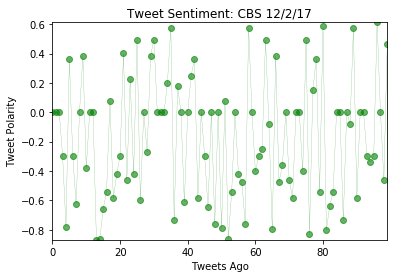

In [6]:
# Plot Time Between Tweets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.6, color="g")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: CBS 12/2/17")
plt.savefig("./cbsnews.png")
plt.show()

In [7]:
#Create X-axis values
tweets_ago = social_analytics_df.loc[social_analytics_df.News_Media=='@CNN']['Tweets_ago']
tweet_compound = social_analytics_df.loc[social_analytics_df.News_Media=='@CNN']['Compound']

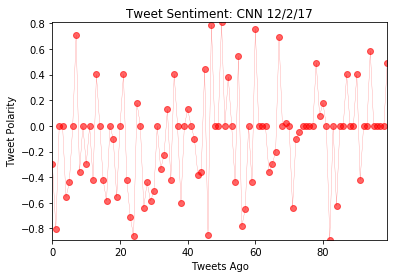

In [8]:
# Plot Time Between Tweets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.6, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: CNN 12/2/17")
plt.savefig("./cnnnews.png")
plt.show()

In [9]:
#Create X-axis values
tweets_ago = social_analytics_df.loc[social_analytics_df.News_Media=='@FoxNews']['Tweets_ago']
tweet_compound = social_analytics_df.loc[social_analytics_df.News_Media=='@FoxNews']['Compound']

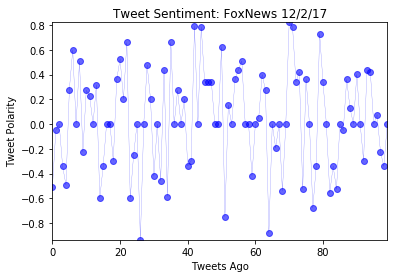

In [10]:
# Plot Time Between Tweets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.6, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: FoxNews 12/2/17")
plt.savefig("./foxnews.png")
plt.show()

In [11]:
#Create X-axis values
tweets_ago = social_analytics_df.loc[social_analytics_df.News_Media=='@nytimes']['Tweets_ago']
tweet_compound = social_analytics_df.loc[social_analytics_df.News_Media=='@nytimes']['Compound']

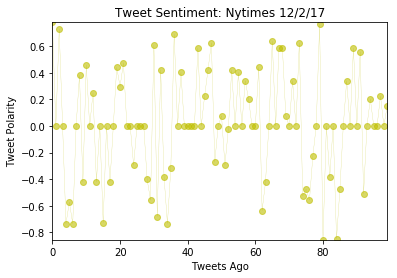

In [12]:
# Plot Time Between Tweets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.6, color="y")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: Nytimes 12/2/17")
plt.savefig("./nytimes.png")
plt.show()

In [15]:
#bar chart for overall sentiments
overall_sentiment = []
for target in target_terms:
    print(target)
    tweet_compound = social_analytics_df.loc[social_analytics_df.News_Media==target]['Compound']
    overall_sentiment.append(np.mean(tweet_compound))
tweets_ago = social_analytics_df.loc[social_analytics_df.News_Media=='FoxNews']['Tweets_ago']
tweet_compound = social_analytics_df.loc[social_analytics_df.News_Media=='FoxNews']['Compound']
print(overall_sentiment)

@BBCNews
@CBSNews
@CNN
@FoxNews
@nytimes
[-0.06405000000000001, -0.16944599999999993, -0.08773800000000004, 0.038298, 0.014364000000000004]


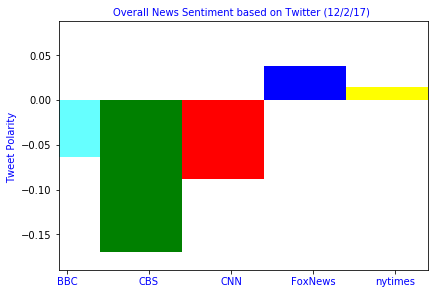

In [18]:
x_axis = [0,1,2,3,4]

plt.bar(0, overall_sentiment[0], facecolor='cyan', alpha=0.6, align="center",width=1.0)
plt.bar(1, overall_sentiment[1], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(2, overall_sentiment[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, overall_sentiment[3], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(4, overall_sentiment[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["BBC","CBS","CNN", "FoxNews", "nytimes"], fontsize=10, color='blue')

plt.xlim(0, 4.5)
plt.ylim(min(overall_sentiment)-0.02, max(overall_sentiment)+0.05)

plt.title("Overall News Sentiment based on Twitter (12/2/17) ", fontsize=10, color='blue')
plt.ylabel("Tweet Polarity ", fontsize=10, color='blue')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)
plt.savefig("./overall_bar.png")
plt.show()